## Normalization in Machine Learning

Source here: https://www.turing.com/kb/data-normalization-with-python-scikit-learn-tips-tricks-for-data-science

The most widely used types of normalization techniques in machine learning are:

- Min-max
- Z-score
- Log scaling

In [23]:
import pandas as pd

In [24]:
df = pd.read_csv("mf_df_2_imputed_water_potability.csv")

In [25]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.833971,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,356.756191,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,312.919044,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [26]:
# removing the potability (target column) to avoid being normalized
df = df.drop('Potability', axis=1)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.833971,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,356.756191,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,312.919044,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


### MinMax

Min-max is a scaling technique where values are rescaled and shifted so that they range between 0 and 1 or between -1 and 1. 

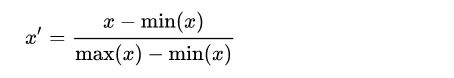

In [27]:
from sklearn.preprocessing import MinMaxScaler

minmax_df = df.copy()

scaler = MinMaxScaler()
scaler.fit(minmax_df)

MinMaxScaler()

In [28]:
scaler.data_max_

array([1.40000000e+01, 3.23124000e+02, 6.12271960e+04, 1.31270000e+01,
       4.81030642e+02, 7.53342620e+02, 2.83000000e+01, 1.24000000e+02,
       6.73900000e+00])

In [29]:
scaler.data_min_

array([  0.        ,  47.432     , 320.94261127,   0.352     ,
       129.        , 181.48375399,   2.2       ,   0.738     ,
         1.45      ])

In [30]:
X = scaler.transform(minmax_df)
X

array([[0.55956934, 0.57113901, 0.33609646, ..., 0.31340165, 0.69975313,
        0.28609102],
       [0.26543429, 0.29740043, 0.30061142, ..., 0.49731851, 0.4509993 ,
        0.57679264],
       [0.57850887, 0.64131081, 0.32161885, ..., 0.56201674, 0.5328657 ,
        0.30363656],
       ...,
       [0.67282217, 0.46548556, 0.53910122, ..., 0.33866167, 0.56065454,
        0.34956996],
       [0.36619735, 0.66440723, 0.19148981, ..., 0.34363779, 0.62265916,
        0.61611996],
       [0.56247653, 0.53563505, 0.28048408, ..., 0.5341137 , 0.63247754,
        0.16244074]])

In [31]:
minmax_df = pd.DataFrame(X, columns=minmax_df.columns)
minmax_df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.559569,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091
1,0.265434,0.297400,0.300611,0.491839,0.646978,0.719411,0.497319,0.450999,0.576793
2,0.578509,0.641311,0.321619,0.698543,0.522452,0.414652,0.562017,0.532866,0.303637
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327
...,...,...,...,...,...,...,...,...,...
3271,0.333436,0.530482,0.775947,0.533436,0.656047,0.603192,0.448062,0.535037,0.564534
3272,0.557775,0.530016,0.279263,0.603473,0.567135,0.368912,0.678284,0.527693,0.254915
3273,0.672822,0.465486,0.539101,0.547807,0.459170,0.438152,0.338662,0.560655,0.349570
3274,0.366197,0.664407,0.191490,0.465860,0.519064,0.387157,0.343638,0.622659,0.616120


### Z-score Normalization (Data Standarization)

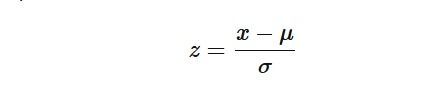

In [32]:
from sklearn.preprocessing import StandardScaler

zscore_df = df.copy()
scaler = StandardScaler()
scaler.fit(zscore_df)

StandardScaler()

In [33]:
scaler.mean_

array([7.08533756e+00, 1.96369496e+02, 2.20140925e+04, 7.12227679e+00,
       3.34014108e+02, 4.26205111e+02, 1.42849702e+01, 6.63464097e+01,
       3.96678617e+00])

In [34]:
X = scaler.transform(zscore_df)
X

array([[ 0.47393972,  0.25919471, -0.13947087, ..., -1.18065057,
         1.27987075, -1.28629758],
       [-2.13298691, -2.03641367, -0.38598665, ...,  0.27059724,
        -0.62103003,  0.68421789],
       [ 0.64180123,  0.84766483, -0.24004734, ...,  0.78111686,
         0.004568  , -1.16736546],
       ...,
       [ 1.47770242, -0.62682923,  1.27080989, ..., -0.98132923,
         0.21692182, -0.85600678],
       [-1.23992128,  1.0413545 , -1.14405809, ..., -0.94206382,
         0.69074215,  0.95079738],
       [ 0.49970614, -0.03854623, -0.52581194, ...,  0.56094007,
         0.76577122, -2.12445866]])

In [35]:
zscore_df = pd.DataFrame(X, columns=zscore_df.columns)
zscore_df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.473940,0.259195,-0.139471,0.112415,0.848242,1.708954,-1.180651,1.279871,-1.286298
1,-2.132987,-2.036414,-0.385987,-0.307694,0.559116,2.062575,0.270597,-0.621030,0.684218
2,0.641801,0.847665,-0.240047,1.360594,-0.518624,-0.094032,0.781117,0.004568,-1.167365
3,0.779584,0.547651,0.000493,0.592008,0.562310,-0.778830,1.255134,2.107555,0.848412
4,1.270506,-0.464429,-0.460249,-0.363698,-0.587051,-0.343939,-0.824357,-2.129449,0.138786
...,...,...,...,...,...,...,...,...,...
3271,-1.530287,-0.081758,2.916188,0.028027,0.637601,1.240155,-0.118075,0.021158,0.601124
3272,0.458040,-0.085667,-0.534295,0.593290,-0.131905,-0.417706,1.698560,-0.034963,-1.497627
3273,1.477702,-0.626829,1.270810,0.144017,-1.066313,0.072263,-0.981329,0.216922,-0.856007
3274,-1.239921,1.041355,-1.144058,-0.517373,-0.547948,-0.288597,-0.942064,0.690742,0.950797


### Log scaling

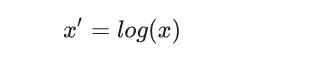

In [36]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

logscale_df = df.copy()
transformer = FunctionTransformer(np.log1p)
X = transformer.transform(logscale_df)
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,2.178605,5.327344,9.942339,2.116281,5.912195,6.337372,2.431838,4.477234,1.377035
1,1.550978,4.870782,9.832585,2.032775,5.879852,6.386686,2.783777,4.048808,1.704867
2,2.208178,5.417150,9.899005,2.329800,5.749135,6.039317,2.883047,4.210943,1.400181
3,2.231816,5.372373,9.999680,2.203795,5.880215,5.897886,2.967154,4.618498,1.727891
4,2.311765,5.204564,9.797015,2.021097,5.740229,5.989990,2.530380,3.496447,1.624341
...,...,...,...,...,...,...,...,...,...
3271,1.734854,5.271366,10.770210,2.100057,5.888735,6.268005,2.700987,4.214904,1.693011
3272,2.175758,5.270706,9.760241,2.204019,5.798028,5.974953,3.039903,4.201440,1.334539
3273,2.343680,5.174808,10.408996,2.122289,5.675526,6.070841,2.488157,4.260500,1.458353
3274,1.812667,5.445028,9.391400,1.988334,5.745328,6.001126,2.498887,4.362948,1.741984


## Conclusion Min-max vs z-score vs log scaling

Min-max normalization is preferred when data doesn’t follow Gaussian or normal distribution. It’s favored for normalizing algorithms that **don’t follow any distribution**, such as **KNN and neural networks**. Note that normalization is affected by outliers.

On the other hand, standardization can be helpful in cases where data **follows a Gaussian distribution**. However, this doesn’t necessarily have to be true. In addition, unlike normalization, standardization doesn’t have a bounding range. This means that **even if there are outliers in data, they won’t be affected by standardization**.

Log scaling is preferable if a dataset holds **huge outliers**.

Many machine learning algorithms find an issue when features are on drastically different scales. Therefore, before implementing algorithms, it’s vital to convert features into the same scale. They can be rescaled based on the available dataset by using one of the normalization techniques covered in this article, namely, min-max, z-score, or log scaling.

## Common Questions

### Q. Should I Normalize or Standardize?
Whether input variables require scaling depends on the specifics of your problem and of each variable.

You may have a sequence of quantities as inputs, such as prices or temperatures.

If the distribution of the quantity is normal, then it should be standardized, otherwise, the data should be normalized. This applies if the range of quantity values is large (10s, 100s, etc.) or small (0.01, 0.0001).

**If the quantity values are small (near 0-1) and the distribution is limited (e.g. standard deviation near 1), then perhaps you can get away with no scaling of the data.**


### Q. Should I Standardize then Normalize?
Standardization can give values that are both positive and negative centered around zero.

It may be desirable to normalize data after it has been standardized.

This might be a good idea of you have a mixture of standardized and normalized variables and wish all input variables to have the same minimum and maximum values as input for a given algorithm, such as an algorithm that calculates distance measures.


### Q. But Which is Best?
This is unknowable.

Evaluate models on data prepared with each transform and use the transform or combination of transforms that result in the best performance for your data set on your model.


### Q. How Do I Handle Out-of-Bounds Values?
You may normalize your data by calculating the minimum and maximum on the training data.

Later, you may have new data with values smaller or larger than the minimum or maximum respectively.

One simple approach to handling this may be to check for such out-of-bound values and change their values to the known minimum or maximum prior to scaling. Alternately, you may want to estimate the minimum and maximum values used in the normalization manually based on domain knowledge.

# Notes on Preprocessing Input in Deep Learning

source: https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/ 

## The Scale of Your Data Matters

Deep learning neural network models learn a mapping from input variables to an output variable.

As such, the scale and distribution of the data drawn from the domain may be different for each variable.

Input variables may have different units (e.g. feet, kilometers, and hours) that, in turn, may mean the variables have different scales.

**Differences in the scales across input variables may increase the difficulty of the problem being modeled**. An example of this is that large input values (e.g. a spread of hundreds or thousands of units) can result in a model that learns large weight values. A model with large weight values is often unstable, meaning that it may suffer from poor performance during learning and sensitivity to input values resulting in higher generalization error.

A target variable with a large spread of values, in turn, may result in **large error gradient values causing weight values to change dramatically, making the learning process unstable**.

Scaling input and output variables is a critical step in using neural network models.

## Scaling Input Variables

If the distribution of the quantity is normal, then it should be standardized, otherwise the data should be normalized. This applies if the range of quantity values is large (10s, 100s, etc.) or small (0.01, 0.0001).

If the quantity values are small (near 0-1) and the distribution is limited (e.g. standard deviation near 1) then perhaps you can get away with no scaling of the data.

Problems can be complex and it may not be clear how to best scale input data.

If in doubt, normalize the input sequence. If you have the resources, **explore modeling with the raw data, standardized data, and normalized data** and **see if there is a beneficial difference in the performance** of the resulting model.

## Scaling Output Variables

The output variable is the variable predicted by the network.

You must ensure that the scale of your output variable matches the scale of the activation function (transfer function) on the output layer of your network.

> If your output activation function has a range of [0,1], then obviously you must ensure that the target values lie within that range. But it is generally better to choose an output activation function suited to the distribution of the targets than to force your data to conform to the output activation function.

If your problem is a **regression problem**, then the output will be a real value.

This is best modeled with a **linear activation function**. If the **distribution of the value is normal**, then you can **standardize** the output variable. Otherwise, the output variable can be **normalized**.

## Modeling Output

In this case, we can see that as we expected, scaling the input variables does result in a model with better performance. Unexpectedly, better performance is seen using normalized inputs instead of standardized inputs. This may be related to the choice of the rectified linear activation function in the first hidden layer.

# Personal Questions

### Q: should I normalize or standardize the target column in the dataset?

Answer from BingGPT

It depends, for example, in regression problems with a **target variable that has a wide spread of values**, **scaling the target variable can reduce the size of the gradient used to update the model weights and result in a more stable model and training process**. If you decide to scale your target variable, you can use either **normalization or standardization**. Normalization rescales the data to have values between 0 and 1, while standardization rescales the data to have a mean of 0 and a standard deviation of 1. The choice between normalization and standardization **depends on the distribution of your target variable**. If it **has a Gaussian distribution, standardization is usually more appropriate**.